# Guía ANOVA Factorial

**Ejercicio 4:** Un proceso fı́sico-quı́mico requiere la explosión controlada de ciertas sustancias en un reactor. Se ha construido un reactor experimental con la finalidad de medir las presiones máximas que debe soportar la cámara del mismo en el momento de la explosión. El factor que más influye en la presión es la temperatura de operación y se desea diseñar el reactor para que trabaje a temperaturas extremas. Se ha realizado un experimento que contempla tres temperaturas: baja (-40°), media (20°) y alta (60°). Además se estudiaron otros dos factores: tipo de explosivo utilizado (A, B, C y D) y emplazamiento (I y II). En cada uno de los 24 tratamientos se repitió el experimento 6 veces. La variable respuesta es la presión máxima alcanzada en el reactor. Los datos están en el archivo ``Reactor.txt``.

In [1]:
setwd("/home/emiliano/EstadisticaAplicada/Estadistica.Aplicada.2018/02_disenio_factorial_y_bloques/datos/")
datos = read.csv("Reactor.csv", sep=",")
#head(datos)
attach(datos)
#str(datos)

temperatura = factor(temperatura, levels=c("baja", "media", "alta"))

Veamos los gráficos de interacción tomando de a 2 factores, como vemos en la tabla previa nos dieron significativos:

- explosivo:temperatura
- emplazamiento:temperatura

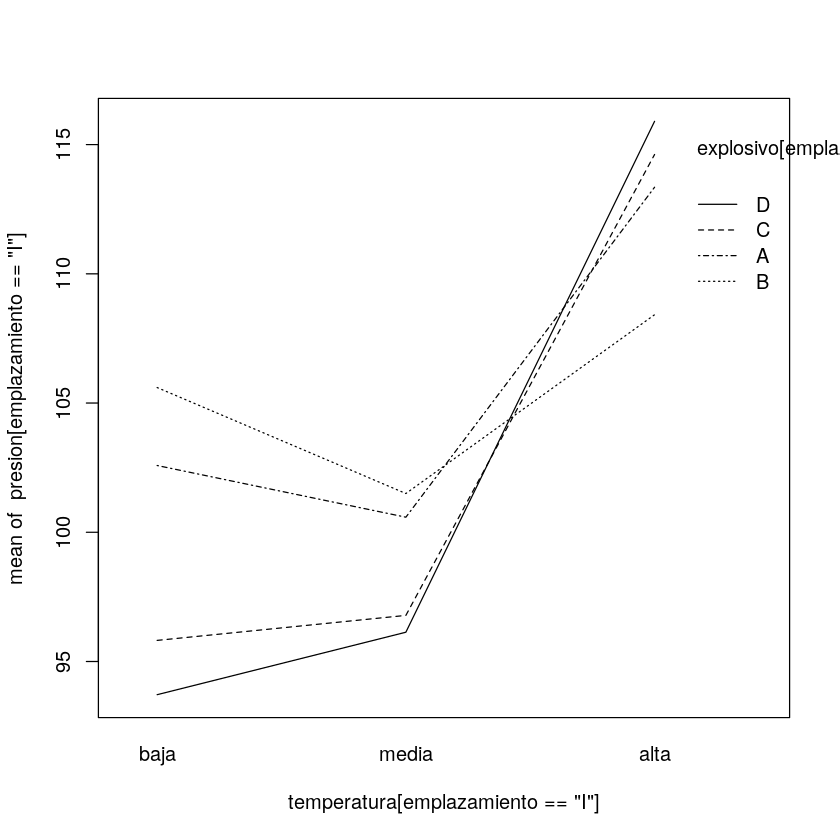

In [6]:
# nosotros lo habiamos hecho sin especificar el emplazamiento, eso hace un promedio, conviene exploratoriamente
# elegir un tipo fijo de emplazamiento
interaction.plot(temperatura[emplazamiento=="I"], explosivo[emplazamiento=="I"], presion[emplazamiento=="I"])

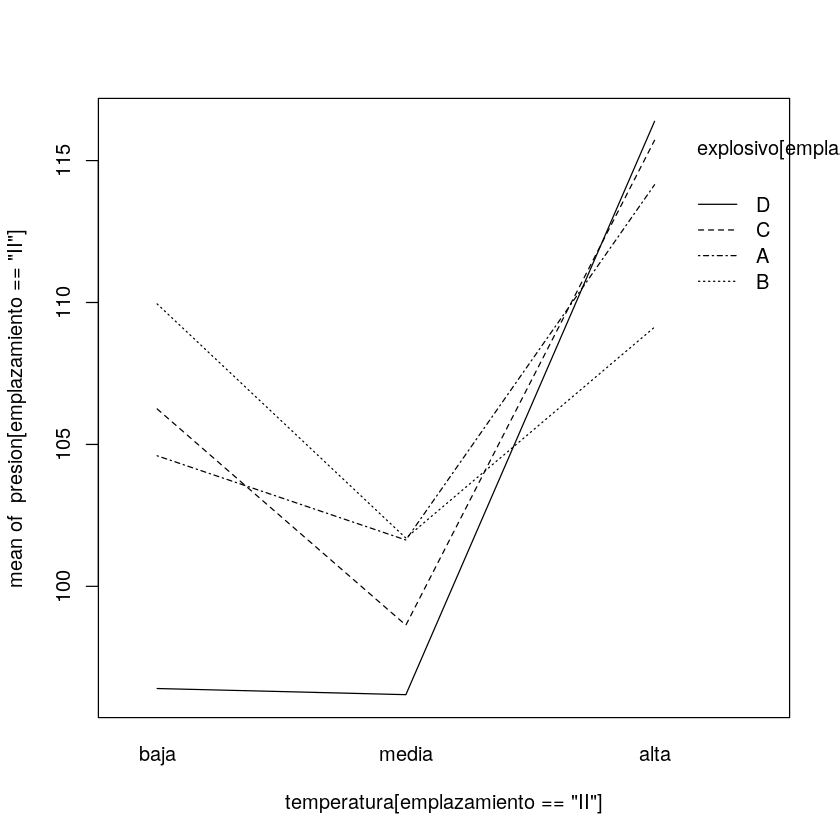

In [7]:
# por eso aca lo hago de nuevo para el emplazamiento II
interaction.plot(temperatura[emplazamiento=="II"], explosivo[emplazamiento=="II"], presion[emplazamiento=="II"])

Lo anterior nos sugiere que el emplazamiento no tiene mucho que ver

In [8]:
# aunque exista interaccion es dificil que te de significativo la interaccion triple, EDNA ESCUCHO Y PARECE QUE 
# ENTENDIO PORQUE DECIA MJM, AJA... PREGUNTAR
modelo = aov(presion~explosivo*emplazamiento*temperatura)
summary(modelo)

                                     Df Sum Sq Mean Sq F value   Pr(>F)    
explosivo                             3    321   107.0   8.793 2.57e-05 ***
emplazamiento                         1    166   165.6  13.601 0.000341 ***
temperatura                           2   5548  2773.8 227.878  < 2e-16 ***
explosivo:emplazamiento               3     67    22.2   1.824 0.146475    
explosivo:temperatura                 6   1334   222.4  18.267 5.52e-15 ***
emplazamiento:temperatura             2    134    66.9   5.496 0.005202 ** 
explosivo:emplazamiento:temperatura   6     73    12.1   0.995 0.431845    
Residuals                           120   1461    12.2                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [10]:
# VEMOS SHAPIRO Y LEVENE
shapiro.test(modelo$residuals)
library(car)
leveneTest(modelo)


	Shapiro-Wilk normality test

data:  modelo$residuals
W = 0.91508, p-value = 1.674e-07


Loading required package: carData


,Df,F value,Pr(>F)
group,23,3.17251,2.150763e-05
,120,NA,NA


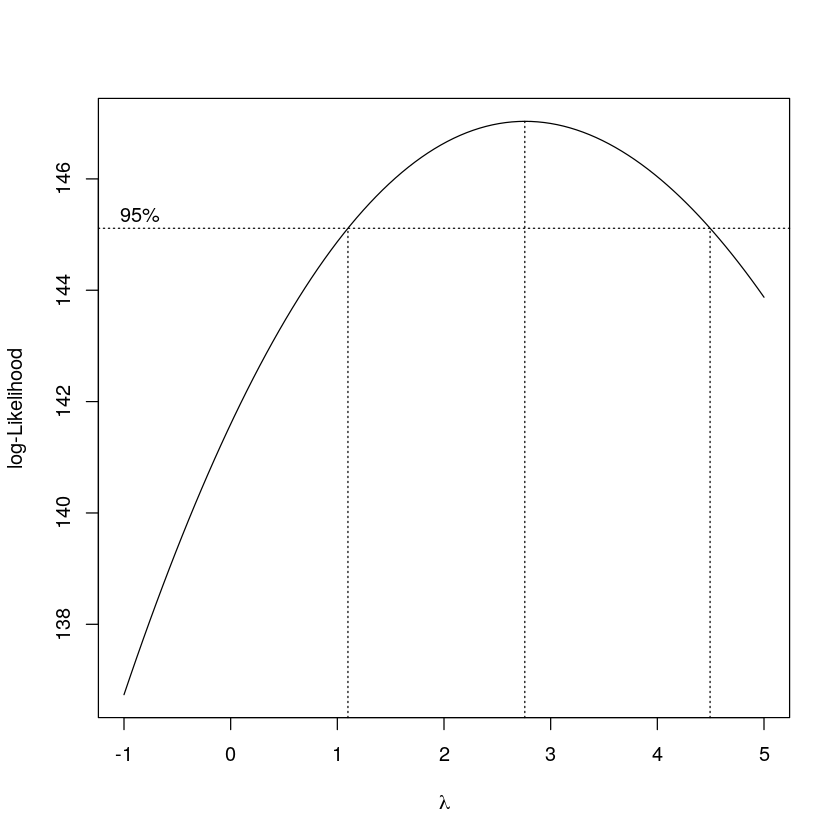

In [15]:
library(MASS)
boxcox(modelo, lambda = seq(-1,5,1))

In [11]:
# tenemos que convertir porque nos dio mal lo anterior
newpresion = bcPower(presion, lambda=3)

m2 = aov(newpresion~explosivo*emplazamiento*temperatura)
summary(m2)
# hacer de nuevo levene y vemos que nos da cualquier cosa, no mejoro nada, seguimos o no seguimos?

                                     Df    Sum Sq   Mean Sq F value   Pr(>F)
explosivo                             3 2.525e+10 8.418e+09   5.968 0.000793
emplazamiento                         1 1.924e+10 1.924e+10  13.641 0.000334
temperatura                           2 7.087e+11 3.543e+11 251.222  < 2e-16
explosivo:emplazamiento               3 7.428e+09 2.476e+09   1.755 0.159406
explosivo:temperatura                 6 1.711e+11 2.852e+10  20.219 3.09e-16
emplazamiento:temperatura             2 1.459e+10 7.295e+09   5.172 0.007005
explosivo:emplazamiento:temperatura   6 8.143e+09 1.357e+09   0.962 0.453875
Residuals                           120 1.693e+11 1.410e+09                 
                                       
explosivo                           ***
emplazamiento                       ***
temperatura                         ***
explosivo:emplazamiento                
explosivo:temperatura               ***
emplazamiento:temperatura           ** 
explosivo:emplazamiento:tem

In [14]:
modelo_interacciones = aov(presion~intemptemp+intexptemp)
summary(modelo_interacciones)#esto esta muy mal

             Df Sum Sq Mean Sq F value   Pr(>F)    
intemptemp    5   5847  1169.4   94.28  < 2e-16 ***
intexptemp    9   1655   183.9   14.83 2.62e-16 ***
Residuals   129   1600    12.4                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [14]:
# podriamos volver a ajustar el modelo con los terminos significativos, los de pvalor grande los ignoradmos
m3 = aov(presion~explosivo+emplazamiento+temperatura + explosivo:temperatura + emplazamiento:temperatura)
summary(m3)

                           Df Sum Sq Mean Sq F value   Pr(>F)    
explosivo                   3    321   107.0   8.630 2.91e-05 ***
emplazamiento               1    166   165.6  13.348 0.000375 ***
temperatura                 2   5548  2773.8 223.644  < 2e-16 ***
explosivo:temperatura       6   1334   222.4  17.928 4.81e-15 ***
emplazamiento:temperatura   2    134    66.9   5.394 0.005627 ** 
Residuals                 129   1600    12.4                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [18]:
# b) el peor es la combinacion de TODOS los tratamientos que dan mas presion (peor)
fABC = paste(temperatura, explosivo, emplazamiento)
m = aov(presion~fABC)
summary(m)

             Df Sum Sq Mean Sq F value Pr(>F)    
fABC         23   7641   332.2    27.3 <2e-16 ***
Residuals   120   1461    12.2                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [17]:
source("/home/emiliano/EstadisticaAplicada/practica/mymultcomp.R") 
maxHSU(presion, fABC, alpha=0.05, mse=12.2, dof=120)

[1] "WARNING: esta funcion considera que todos los ni son iguales"
[1] "alta A I"
[1] "alta A II"
[1] "alta C I"
[1] "alta C II"
[1] "alta D I"
[1] "alta D II"


[1] NA          "alta A I"  "alta A II" "alta C I"  "alta C II" "alta D I" 
[7] "alta D II"

In [19]:
# me pide la varianza asociada al peor caso, pero el peor tiene varios que son equivalentes estadisticamente
# encuentro el peor, los que son equivalentes al peor y despues busco la varianza teniendo en cuenta todos esos 
# casos que son equivalentes al peor

# 12.2 es la varianza
# 6*6 es la cantidad de replicas x la cantidad de tratamientos equivalentes al peor
SE = sqrt(12.2/(6*6))

idx = which(explosivo=="B" & temperatura=="alta")
muhat = mean(presion[temperatura=="alta"][-idx]) # no incluye a los que no son equivalentes en la cuenta

In [20]:
muhat

[1] 113.4583